# CoinCounter Tutorial

Этот модуль позволяет вычислять сумму денег по фотографии в долларах, используя модель машинного обучения для детекции объектов. В этом туториале будет показано, как использовать этот модуль для детекции монет и расчета общей суммы.

## Шаг 1. Импорт библиотек
Для начала необходимо импортировать функцию predict из модуля CoinCounter, которая отвечает за предсказание суммы на изображениях.

In [1]:
from CoinCounter.model import predict

## Шаг 2. Запуск функции предсказания
Вызовем функцию predict с необходимыми параметрами. Параметры включают путь к изображению или папке с изображениями, а также настройки порогов уверенности и перекрытия для YOLO модели.

In [2]:
results = predict(
    path = 'data', 
    conf = 0.3,
    iou = 0.3
)

Loading CoinCounter\models\model.onnx for ONNX Runtime inference...


### Описание параметров функции `predict`

Функция `predict` выполняет предсказания с помощью модели YOLO и позволяет настраивать различные параметры для улучшения точности и контроля над результатами. Вот подробное описание каждого параметра:

- **`path`** (str): 
  - Путь к изображению или директории с изображениями, для которых требуется выполнить предсказание. 
  - Пример: `'data/image.jpg'` или `'data/'` для директории с изображениями.

- **`conf`** (float, по умолчанию 0.25): 
  - Порог уверенности (confidence threshold) для предсказаний.
  - Значение от 0.0 до 1.0, где более высокие значения уменьшают количество ложных срабатываний. 
  - Например, `0.5` означает, что модель будет считать предсказания уверенными только если уверенность больше или равна 50%.

- **`iou`** (float, по умолчанию 0.45): 
  - Порог перекрытия (IoU threshold) для фильтрации предсказанных рамок.
  - Значение от 0.0 до 1.0, где более высокие значения увеличивают строгость отбора предсказаний.
  - Например, `0.5` означает, что предсказания будут учитываться только если перекрытие между предсказанными рамками и истинными рамками больше или равно 50%.

## Шаг 3. Получение результатов
После выполнения детекции можно вывести результаты для каждого изображения.

### Получение суммы с фото
Можно также вывести общую сумму для всех изображений, обработанных функцией, или с каждого изображения по отдельности

In [3]:
print(f'Сумма для всех фото: {results.total()}')

Сумма для всех фото: 33.98


In [4]:
for n in range(len(results)):
    print(f'Сумма для фото номер {n+1}: {results.total(n)}')

Сумма для фото номер 1: 0.48
Сумма для фото номер 2: 33.0
Сумма для фото номер 3: 0.5


### Визуализация результата
Метод results.show() позволяет вывести изображение с размеченными объектами (монетами или купюрами), обнаруженными на фотографии. Вы можете настроить количество столбцов для отображения нескольких изображений в сетке и масштаб каждого изображения.

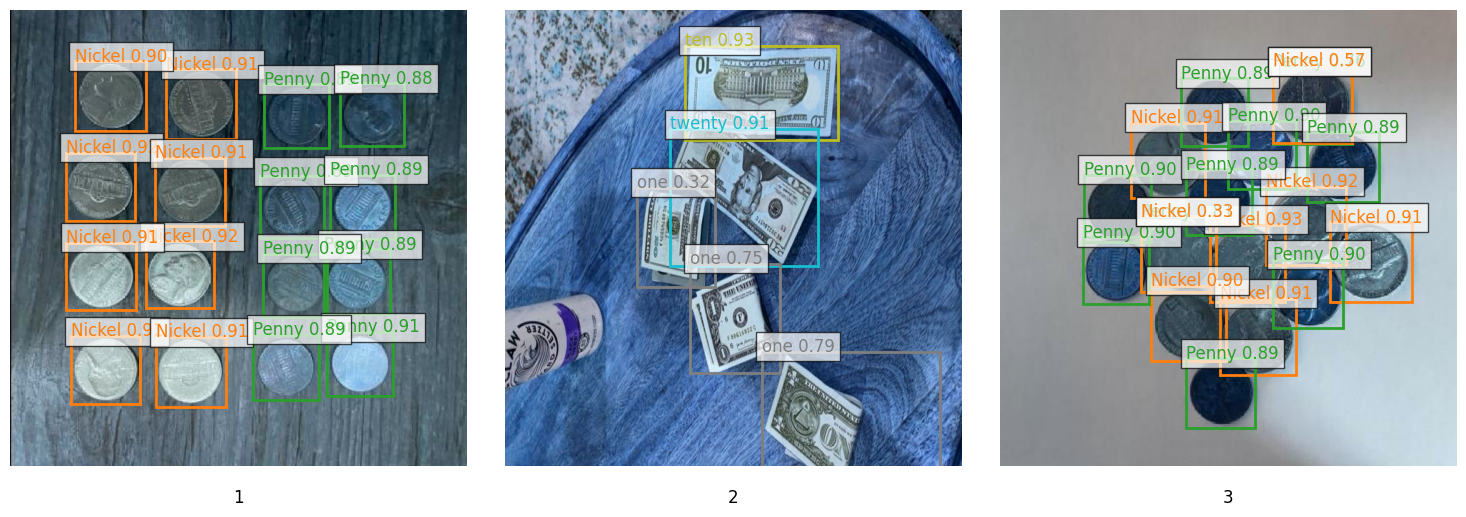

In [5]:
results.show(num_cols=3, scale=1)

### Подробный результат
Для лучшего понимания результатов можно использовать метод df, который является объектом pandas.DataFrame, что позволит подробно анализировать результат

In [6]:
import matplotlib.pyplot as plt

In [7]:
df = results.df
df.head()

,Dime,Nickel,Penny,Quarter,fifty,five,hundred,one,ten,twenty,total
0,0,8,8,0,0,0,0,0,0,0,0.48
1,0,0,0,0,0,0,0,3,1,1,33.00
2,0,8,10,0,0,0,0,0,0,0,0.50


#### Диограмма количества объектов на всех фото

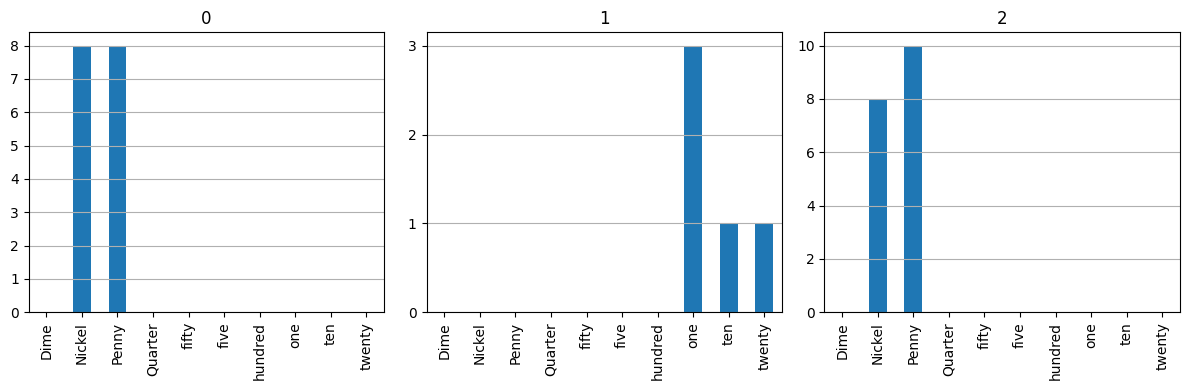

In [8]:
import matplotlib.ticker as ticker

# Определяем размер сетки для подграфиков
df_ = df.drop('total', axis=1)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Проходим по каждой строке и строим график
for i in range(3):
    ax = axes[i]
    df_.iloc[i].plot.bar(ax=ax, title=f'{i}')
    
    # Добавляем горизонтальную сетку
    ax.grid(axis='y')
    
    # Настраиваем деления осей на целые числа
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Добавляем отступы между графиками
plt.tight_layout()
plt.show()

<Axes: >

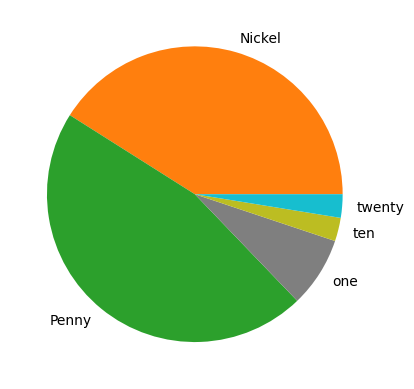

In [9]:
df.drop('total',axis=1).sum().plot.pie()